In [87]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import seaborn
import seaborn as sns

In [88]:
# use pandas to import csv file
df = pd.read_csv("House_Rent_main7.csv")
# too see max columns
pd.set_option('display.max_columns',None)
# print dataframe
df

Unnamed: 0  BHK   Rent  Size  Area Type  City  Furnishing Status  \
0              0    2  10000  1100          1     1                  1   
1              1    2  20000   800          1     1                  2   
2              2    2  17000  1000          1     1                  2   
3              3    2  10000   800          1     1                  1   
4              4    2   7500   850          2     1                  1   
...          ...  ...    ...   ...        ...   ...                ...   
4714        4714    2  15000  1000          2     6                  2   
4715        4715    3  29000  2000          1     6                  2   
4716        4716    3  35000  1750          2     6                  2   
4717        4717    3  45000  1500          2     6                  2   
4718        4718    2  15000  1000          2     6                  1   

      Tenant Preferred  Bathroom  \
0                    0         2   
1                    0         1   
2                    0         1   
3                    0         1   
4                    1         1   
...                ...       ...   
4714                 0         2   
4715                 0         3   
4716                 0         3   
4717                 2         2   
4718                 1         2   

      Area Locality_ Beeramguda, Ramachandra Puram, NH 9  \
0                                                     0    
1                                                     0    
2                                                     0    
3                                                     0    
4                                                     0    
...                                                 ...    
4714                                                  0    
4715                                                  0    
4716                                                  0    
4717                                                  0    
4718                                                  0    

      Area Locality_ in Boduppal, NH 2 2  Area Locality_ in Erragadda, NH 9  \
0                                      0                                  0   
1                                      0                                  0   
2                                      0                                  0   
3                                      0                                  0   
4                                      0                                  0   
...                                  ...                                ...   
4714                                   0                                  0   
4715                                   0                                  0   
4716                                   0                                  0   
4717                                   0                                  0   
4718                                   0                                  0   

      Area Locality_ in Miyapur, NH 9  \
0                                   0   
1                                   0   
2                                   0   
3                                   0   
4                                   0   
...                               ...   
4714                                0   
4715                                0   
4716                                0   
4717                                0   
4718                                0   

      Area Locality_117 Residency, Chembur East  Area Locality_2 BHK  \
0                                             0                    0   
1                                             0                    0   
2                                             0                    0   
3                                             0                    0   
4                                             0                    0   
...                                         ...                  ...   
4714             

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4719 entries, 0 to 4718
Columns: 2235 entries, Unnamed: 0 to Area Locality_whitefield
dtypes: int64(2235)
memory usage: 80.5 MB


In [90]:
#New dataframe 
new_df = df
#Checking for null values 
print(new_df.isnull().sum()) 
print("Missing values distribution: ")
print(new_df.isnull().mean())

Unnamed: 0                                   0
BHK                                          0
Rent                                         0
Size                                         0
Area Type                                    0
                                            ..
Area Locality_vanamali chs ghatla, Ghatla    0
Area Locality_venkatapuram                   0
Area Locality_venkatesa perumal nagar        0
Area Locality_villvam towers tnhb colony     0
Area Locality_whitefield                     0
Length: 2235, dtype: int64
Missing values distribution: 
Unnamed: 0                                   0.0
BHK                                          0.0
Rent                                         0.0
Size                                         0.0
Area Type                                    0.0
                                            ... 
Area Locality_vanamali chs ghatla, Ghatla    0.0
Area Locality_venkatapuram                   0.0
Area Locality_venkatesa perumal na

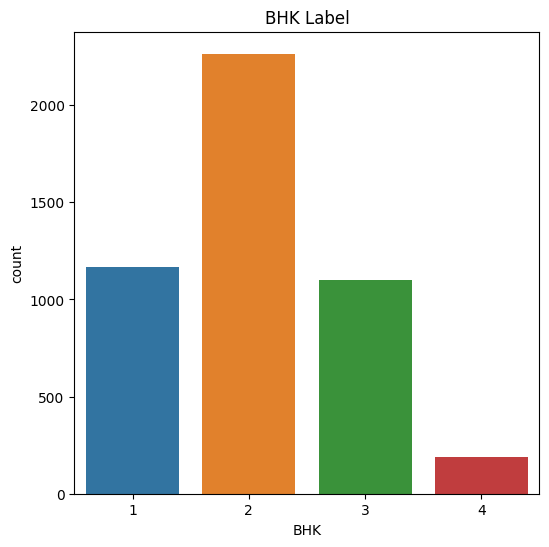

In [91]:
df.BHK.value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='BHK', data=new_df)
plt.title('BHK Label')
plt.show()

In [105]:
from sklearn.datasets import make_classification
X, y = make_classification(n_classes=2, class_sep=0.5,
weights=[0.05, 0.95], n_informative=2, n_redundant=0, flip_y=0,
n_features=2, n_clusters_per_class=1, n_samples=1000, random_state=10)

In [106]:
from sklearn.model_selection import train_test_split
# split into 75:25 ratio
X_train, X_test, y_train, y_test = train_test_split(df.drop('BHK', axis=1), df['BHK'], test_size=0.2, random_state=42)

0.7002118644067796


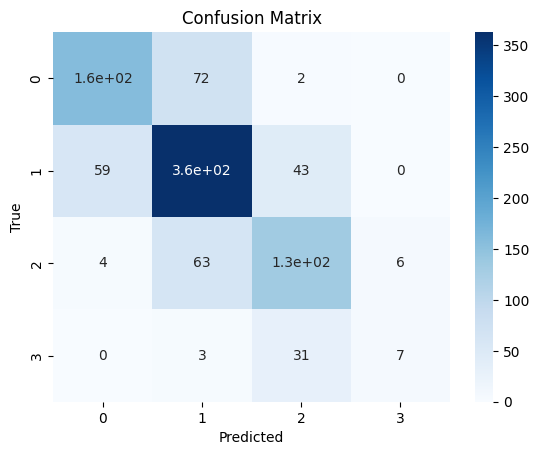

In [107]:
#KNN classifer
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier() 
model.fit(X_train, y_train) 
y_pred = model.predict(X_test) 
#Accuracy and Confusion matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, model.predict(X_test))) 

# Plot the confusion matrix using heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy: 0.68
[[182  49   1   0]
 [ 96 354  15   0]
 [  4 106  92   4]
 [  0   7  21  13]]


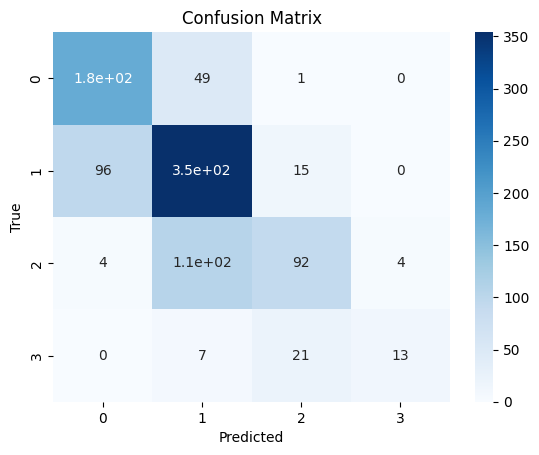

In [95]:
#Naive Bayes Classifier

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('BHK', axis=1), df['BHK'], test_size=0.2, random_state=42)

# Convert categorical variables into numerical variables
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Test the model and calculate accuracy
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix using heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [96]:
#split dataset in features and target variable
feature_cols = ['Rent', 'Size','Area Type', 'City','Furnishing Status','Tenant Preferred','Bathroom']
X = df[feature_cols] # Features
y = df['BHK'] # Target variable

In [97]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Accuracy: 0.784957627118644


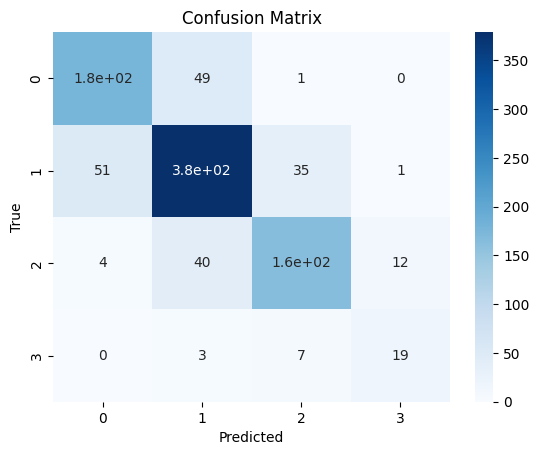

In [98]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
cm = confusion_matrix(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Plot the confusion matrix using heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Accuracy of Random Forest Classifier: 0.83


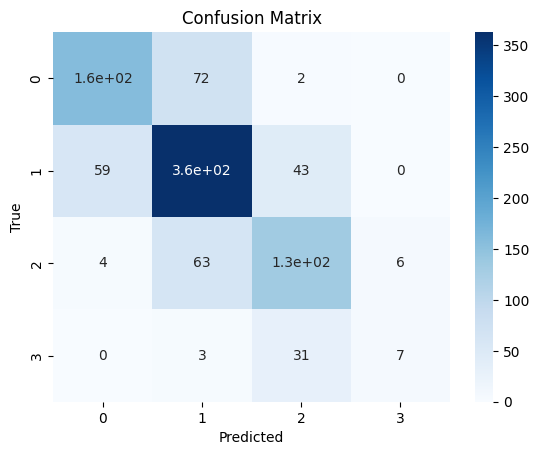

In [108]:
#Random forest classifier
X_train, X_test, y_train, y_test = train_test_split(df.drop('BHK', axis=1), df['BHK'], test_size=0.2, random_state=42)

# Scale the features using standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Test the Random Forest Classifier
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy:.2f}")

# Plot the confusion matrix using heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()